In [1]:
!pip install tensorboard

In [7]:
%load_ext tensorboard
%tensorboard --logdir ./roundabout-v0/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 14552), started 0:00:02 ago. (Use '!kill 14552' to kill it.)

In [35]:
import pandas as pd

paper_data = pd.read_csv("./q_masking_data.csv")
our_data = pd.read_csv("./proximity_penalty_data.csv")

In [36]:
paper_data = paper_data["Value"].values
our_data = our_data["Value"].values

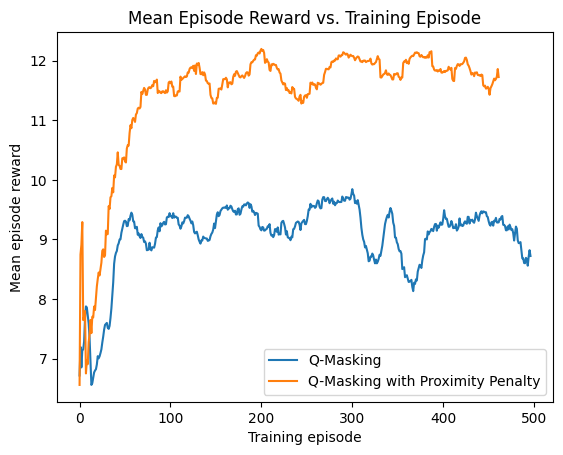

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(len(paper_data)), paper_data, label="Q-Masking")
plt.plot(range(len(our_data)), our_data, label="Q-Masking with Proximity Penalty")
plt.xlabel("Training episode")
plt.ylabel("Mean episode reward")
plt.title("Mean Episode Reward vs. Training Episode")
plt.legend()
plt.show()

In [48]:
# Crashes per 10,000 timesteps, manually recorded using num_collisions_test.py
data = {
    "our_data" : [8, 10, 4, 5, 7],
    "q_masking" : [15, 22, 19, 14, 18]
}

std = lambda x, x_mean: sum((val - x_mean)**2 for val in x) ** 0.5
our_data_mean = sum(data["our_data"]) / len(data["our_data"])
our_data_std = std(data["our_data"], our_data_mean)
q_masking_mean = sum(data["q_masking"]) / len(data["q_masking"])
q_masking_std = std(data["q_masking"], q_masking_mean)

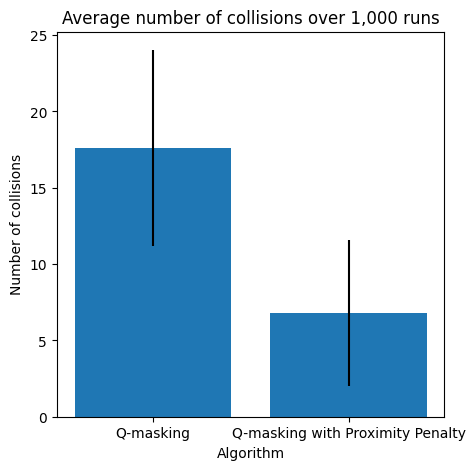

In [62]:
plt.figure(figsize=(5, 5))
plt.bar(
    ["Q-masking", "Q-masking with Proximity Penalty"],
    [q_masking_mean, our_data_mean],
    yerr=[q_masking_std, our_data_std]
)
plt.title("Average number of collisions over 1,000 runs")
plt.xlabel("Algorithm")
plt.ylabel("Number of collisions")
plt.show()